In [1]:
##Importing DataSets:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train dataset
df = pd.read_excel("Data_Train.xlsx") #Reading excel file
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#importing test dataset
dff = pd.read_excel("Test_set.xlsx") # reading excel file
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Above are my train and test datasets and the target is seems to be price so this particular problem is Regression Problem.

Features Information:
Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Route: The route taken by the flight to reach the destination.
Dep_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.
Additional_Info: Additional information about the flight
Price: The price of the ticket
Above are the features of flight Price



In [4]:
#1.Train dataset:
##Preprocessing and EDA:
#Checking shape of my dataset(Train data)
df.shape


(10683, 11)

In [5]:
#Checkig  all the column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
#Checking the data types of all columns(Train data)
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
#Checking the information(info) about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#Checking unique values of each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [9]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019    

In [10]:
##Checking null values in the dataset
df.isnull().sum()

##Imputation technique to replace nan values:

#Replacing naa values with there mode as those two columns are categorical
df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [11]:
# checking null values after imputation
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now all the Nan values are replaced

In [12]:
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

 price is our Target Column...we were cecking for the unique values of our target column

In [13]:
#Checking for empty observations
df.loc[df['Price'] == " "]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


there is no empty observations

In [14]:

#Feature Extraction:
#Converting object data type to datetime 

df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [15]:
# checking the data types of all columns again
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
#  Extracting journey year,month and day from date of journey

#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
#Droping Date of journey column after extraction
df = df.drop(["Date_of_Journey"],axis=1)


This particular duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,-h-m) so let me extract proper duration column from the Arrival_time and Dep_time.

In [17]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

In [18]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [19]:

df = df.drop(["Dep_Time"],axis=1)

In [20]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [21]:

#Droping Arrival_Time column after extraction
df = df.drop(["Arrival_Time"],axis=1)

In [22]:
# printing the dataset after extraction
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [23]:


#lets check the value counts now
for i in df.columns:
       print(df[i].value_counts())
       print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU

In [24]:
#Droping unnecessary column
df = df.drop(["Journey_Year"],axis=1)

In [25]:
#By looking into the categorical columns i can do grouping as follows.

df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [26]:
#Grouping Destination column
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [27]:
#Grouping Additional_Info column
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

In [28]:
#Let me assign values for Total_Stops column
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)
 

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1,No info,13302,1,3,16,50,21,35


In [30]:
df.describe()

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


In [31]:
#Visualization:
#Univariate Analysis:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [32]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


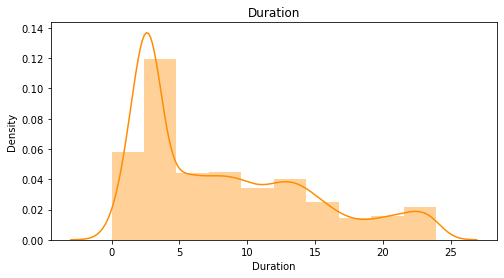

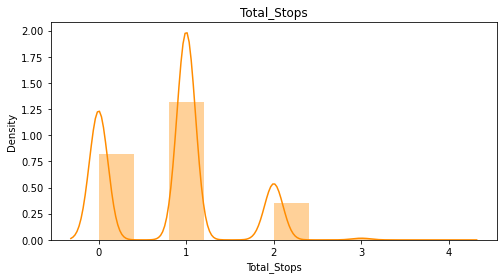

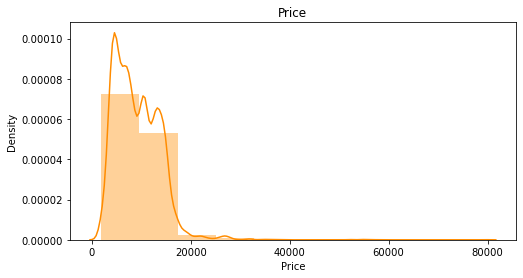

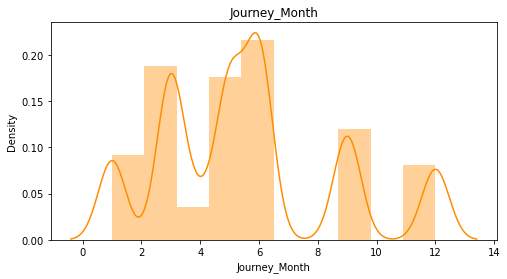

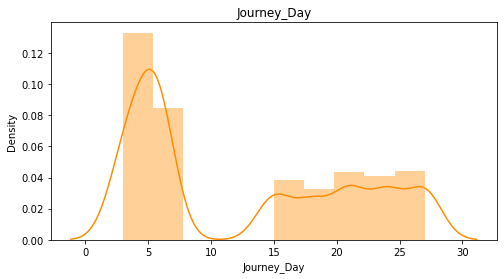

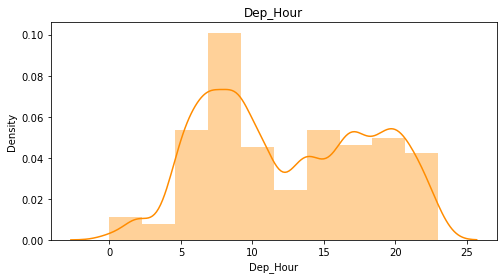

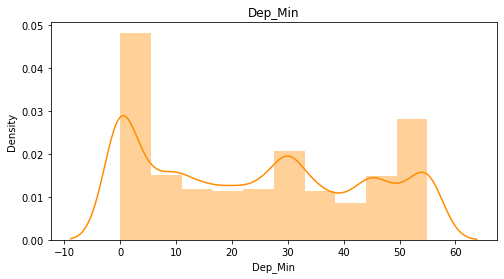

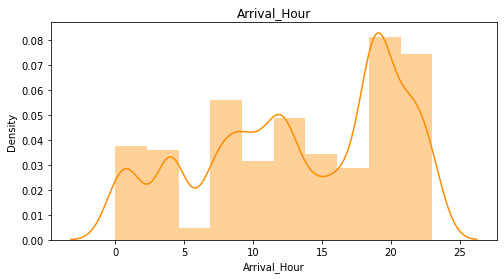

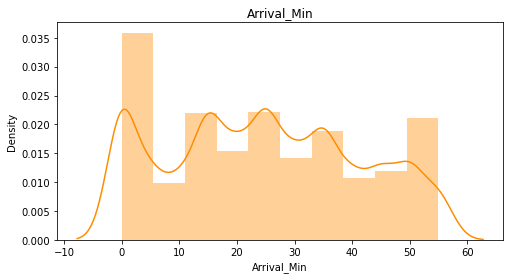

In [33]:
#Univariate analysis for numerical columns:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="darkorange")
    plt.title(i)
    plt.show()

In [34]:
#Univariate Analysis for categorical columns:
#checking the  value counts of airline column
df.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [35]:
#Checking the value counts of Airline column
df.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

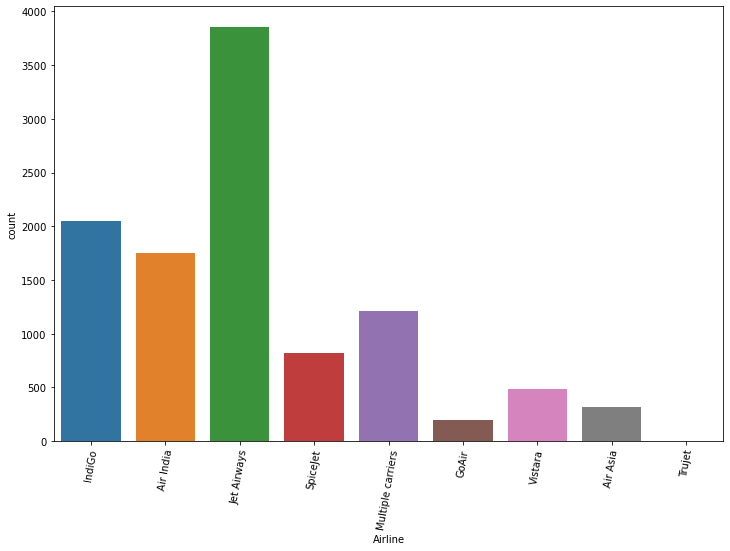

In [36]:
#Count plot for Airline column
plt.figure(figsize=[12,8])
sns.countplot(df['Airline'])
plt.xticks(rotation=80);

In [37]:
#checking the valuecounts of source column
df.Source.value_counts

<bound method IndexOpsMixin.value_counts of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object>

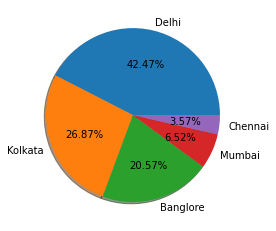

In [38]:
#Ploting pie chart for Source column
labels='Delhi','Kolkata','Banglore','Mumbai','Chennai'
fig, ax = plt.subplots()
ax.pie(df['Source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Delhi has maximum count which means Delhi is taken as source in maximum airlines. where as kolkata has minimmum count in above given labels.

In [39]:
#Checking the value counts of Destination column
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

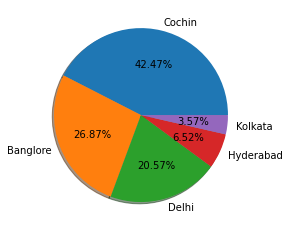

In [40]:
#Ploting pie chart for Destination column
labels='Cochin','Banglore','Delhi','Hyderabad','Kolkata'
fig, ax = plt.subplots()
ax.pie(df['Destination'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Cochin is maximum airlines for destination and for few airlines kolkata is the destination.

In [41]:
#Checking the value counts of Route column
df.Route.value_counts()

DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

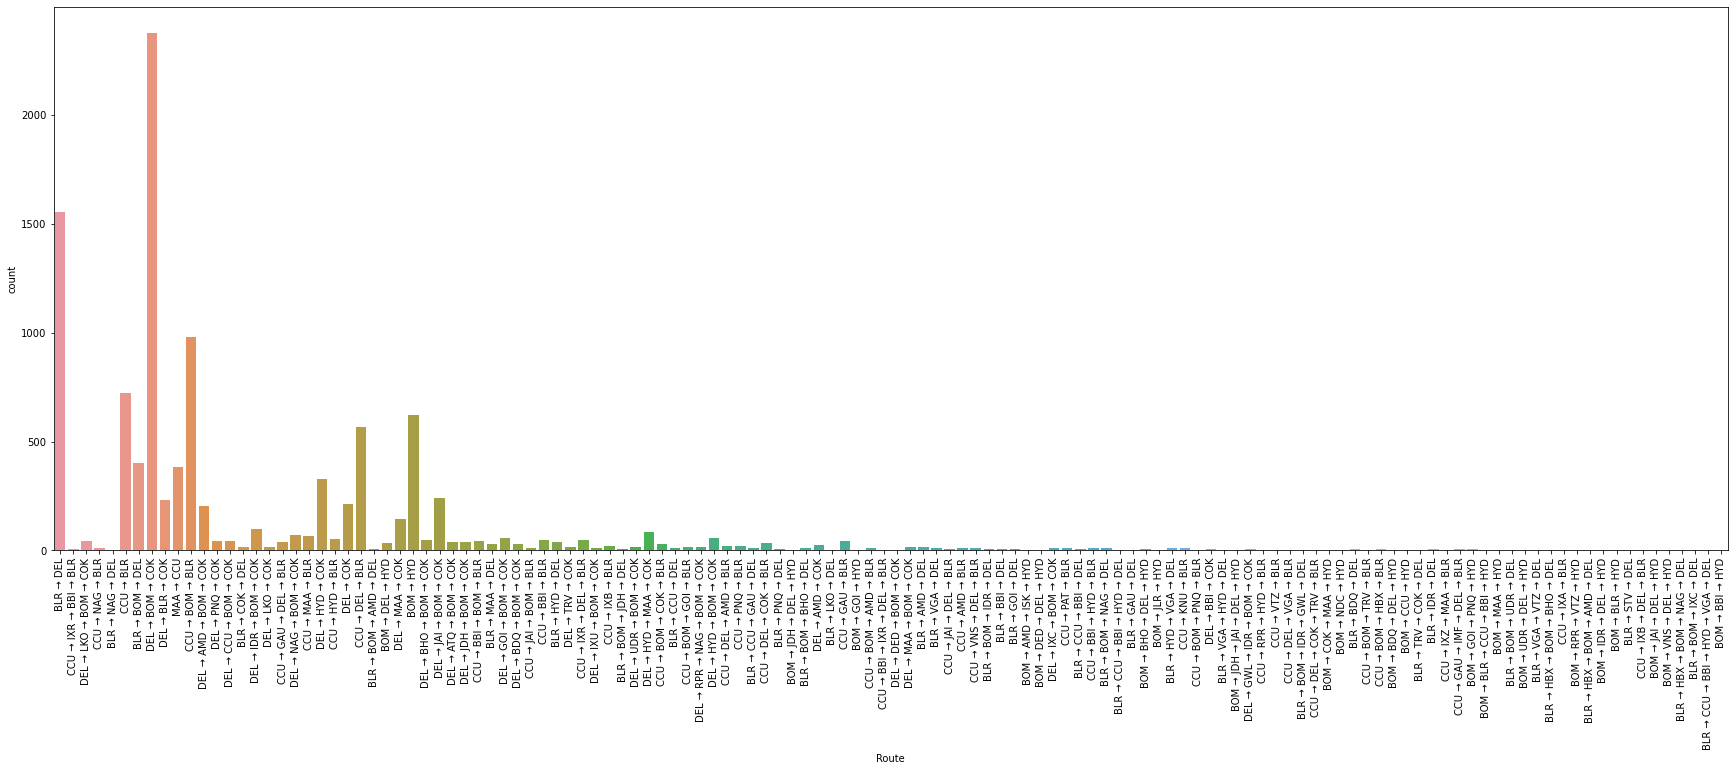

In [42]:
#count plot for route column
plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

In [43]:
#Checking the value counts of additional info column
df.Additional_Info.value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

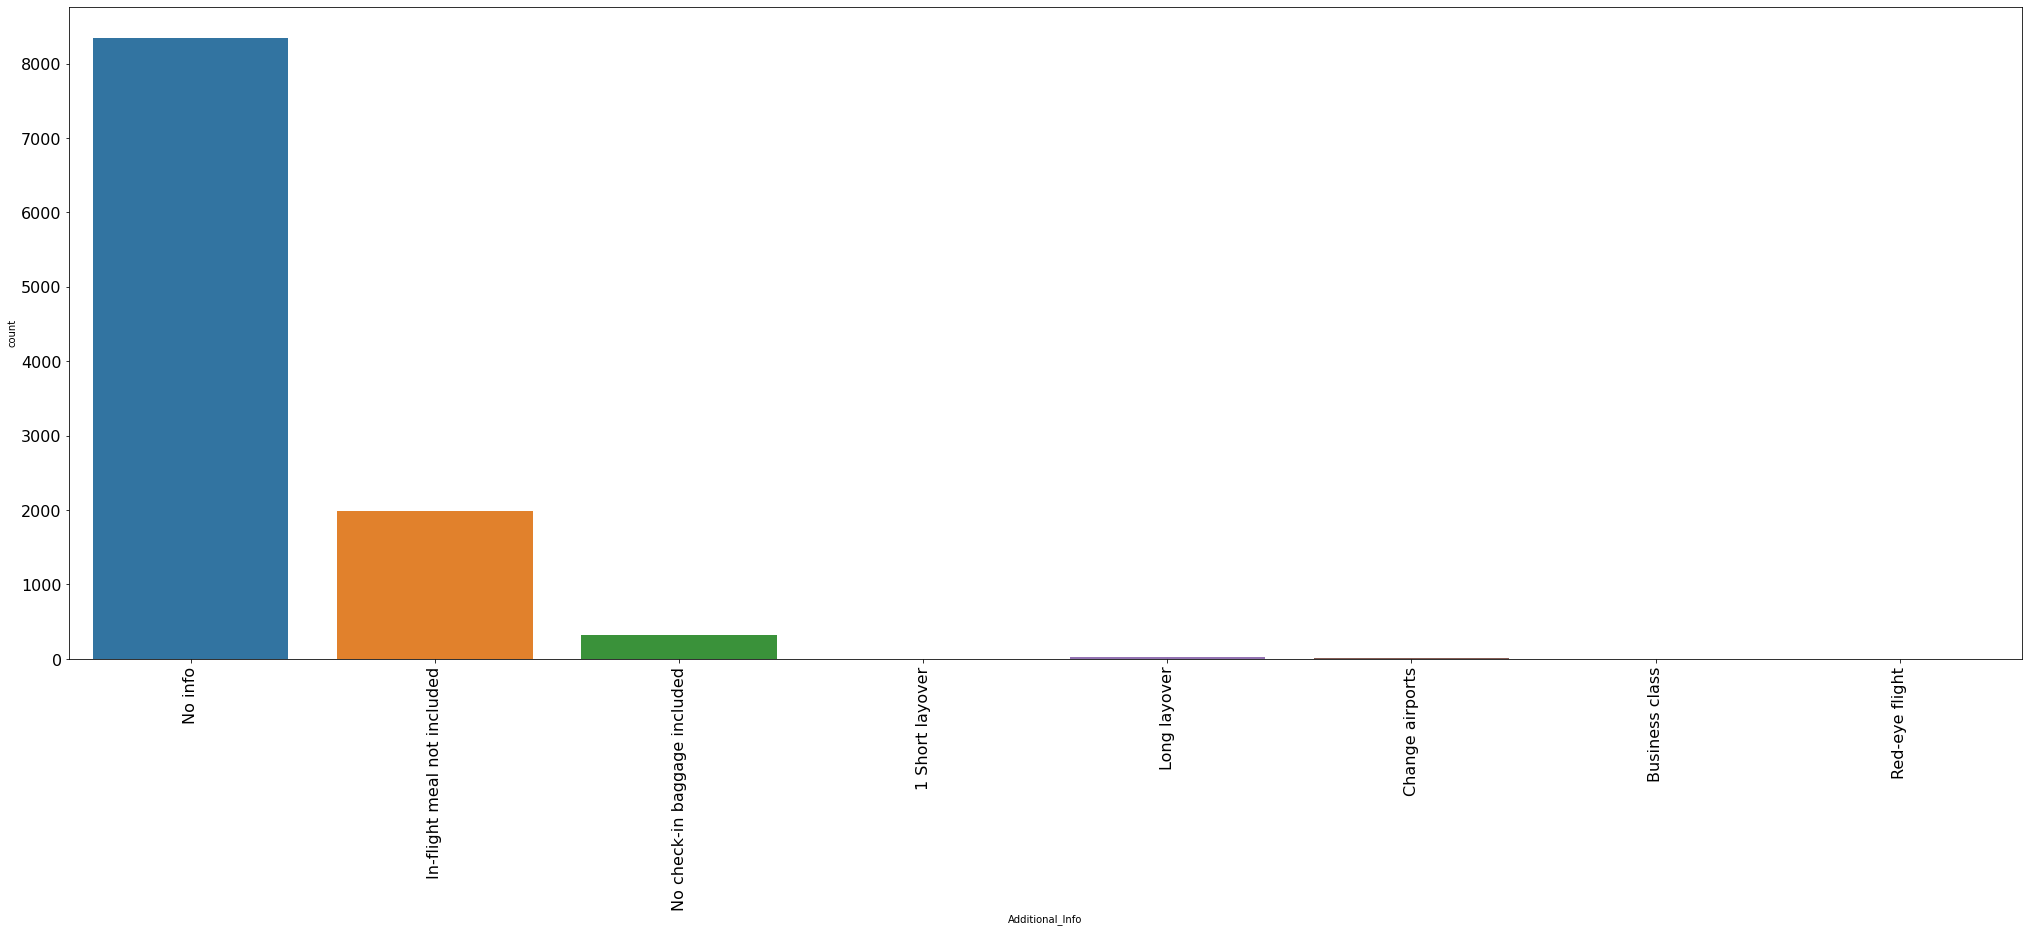

In [44]:
#Count plot for additional info column
plt.figure(figsize=[35,12])
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(rotation=0,fontsize=16);

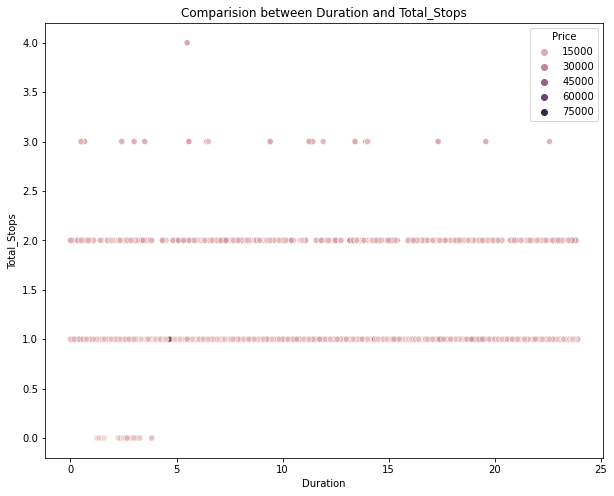

In [45]:
##Bivariate Analysis:
#Comparision between features using scatter plot
plt.figure(figsize=[10,8])
plt.title('Comparision between Duration and Total_Stops')
sns.scatterplot(df['Duration'],df['Total_Stops'],hue=df['Price']);


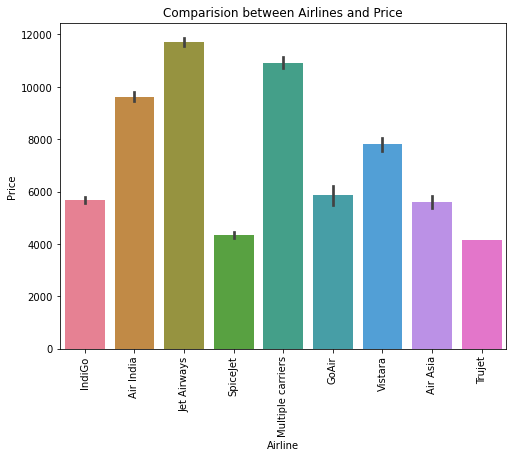

In [46]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


In Air India, Multiple carriers and Jet Airways the price is high they look costly.
Trujet and Spicejet are cheaper compared to other airlines.

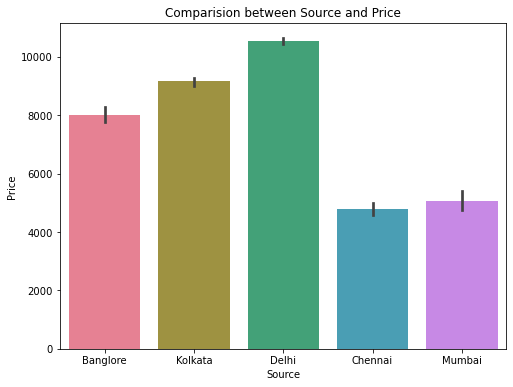

In [47]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df,palette="husl")
plt.show()

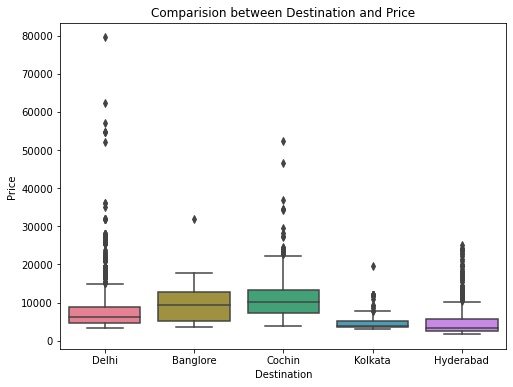

In [48]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.boxplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.show()

If Cochin is the destination then the orice is more compared to other airlines.

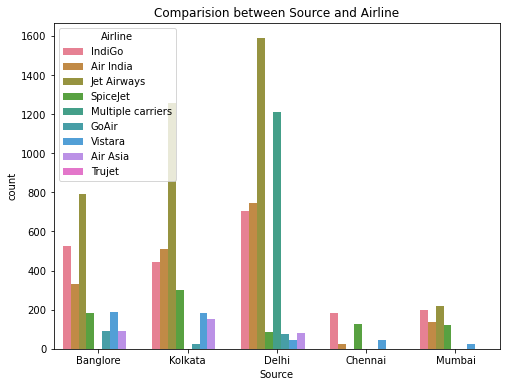

In [49]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.show()

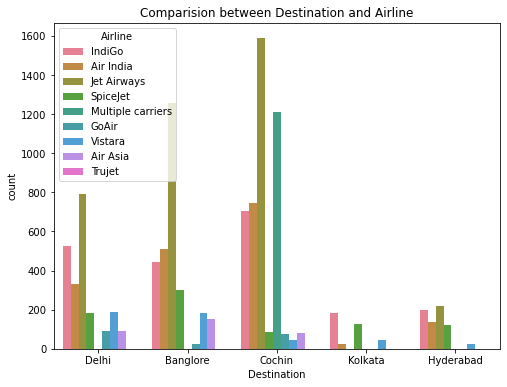

In [50]:
#Comparision between features using count plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Airline')
sns.countplot(x="Destination",hue="Airline",data=df,palette="husl")
plt.show()

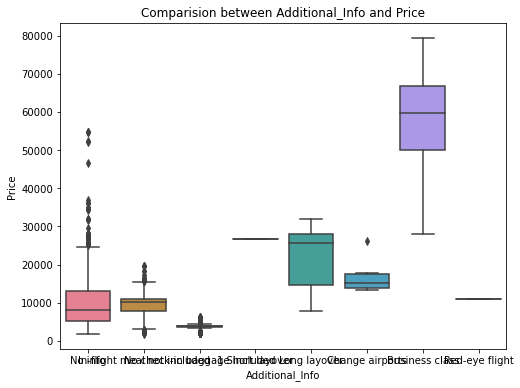

In [51]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Additional_Info and Price')
sns.boxplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.show()

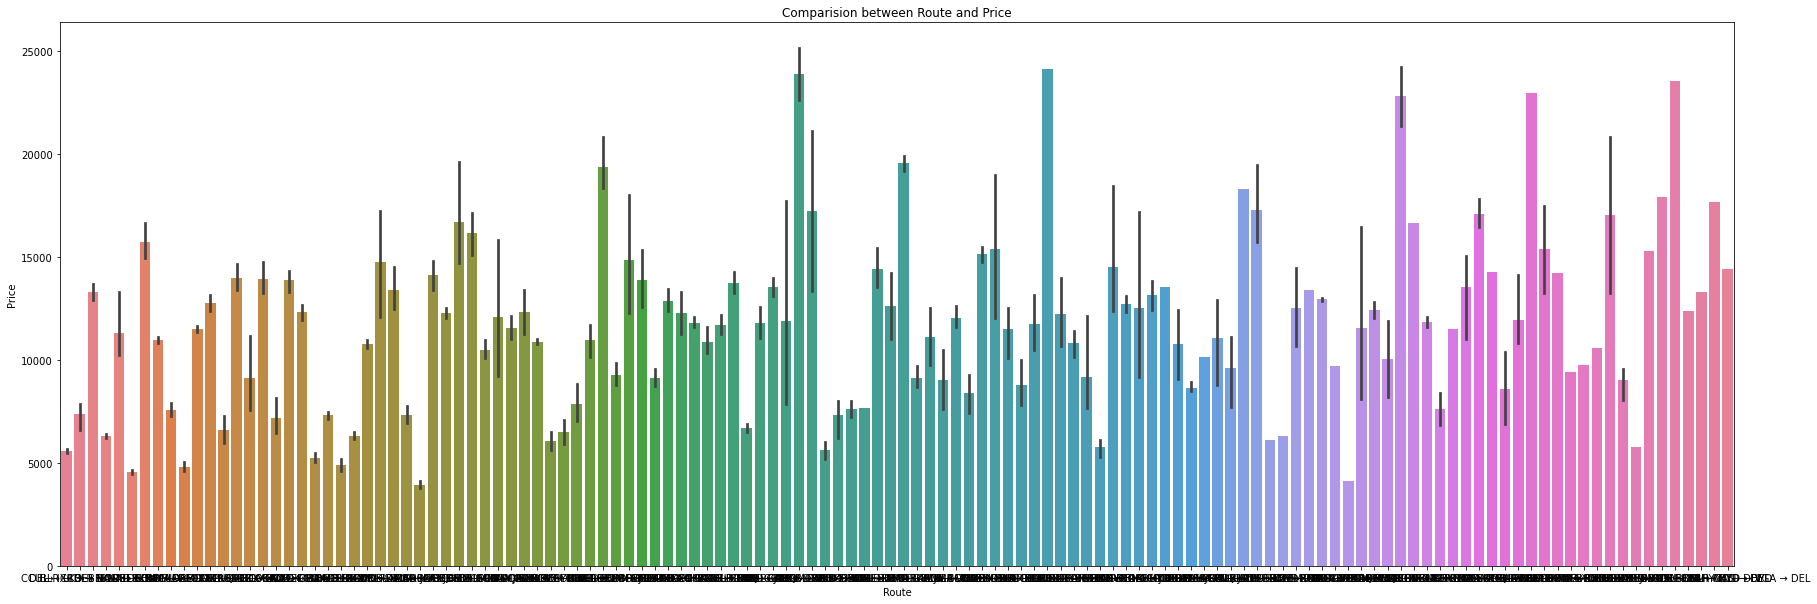

In [52]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.show()

BOM->JDH->DEL->HYD, BOM->DED->DEL->HYD and BOM->BOQ->DEL->HYD Routes has maximum price compared to other routes.

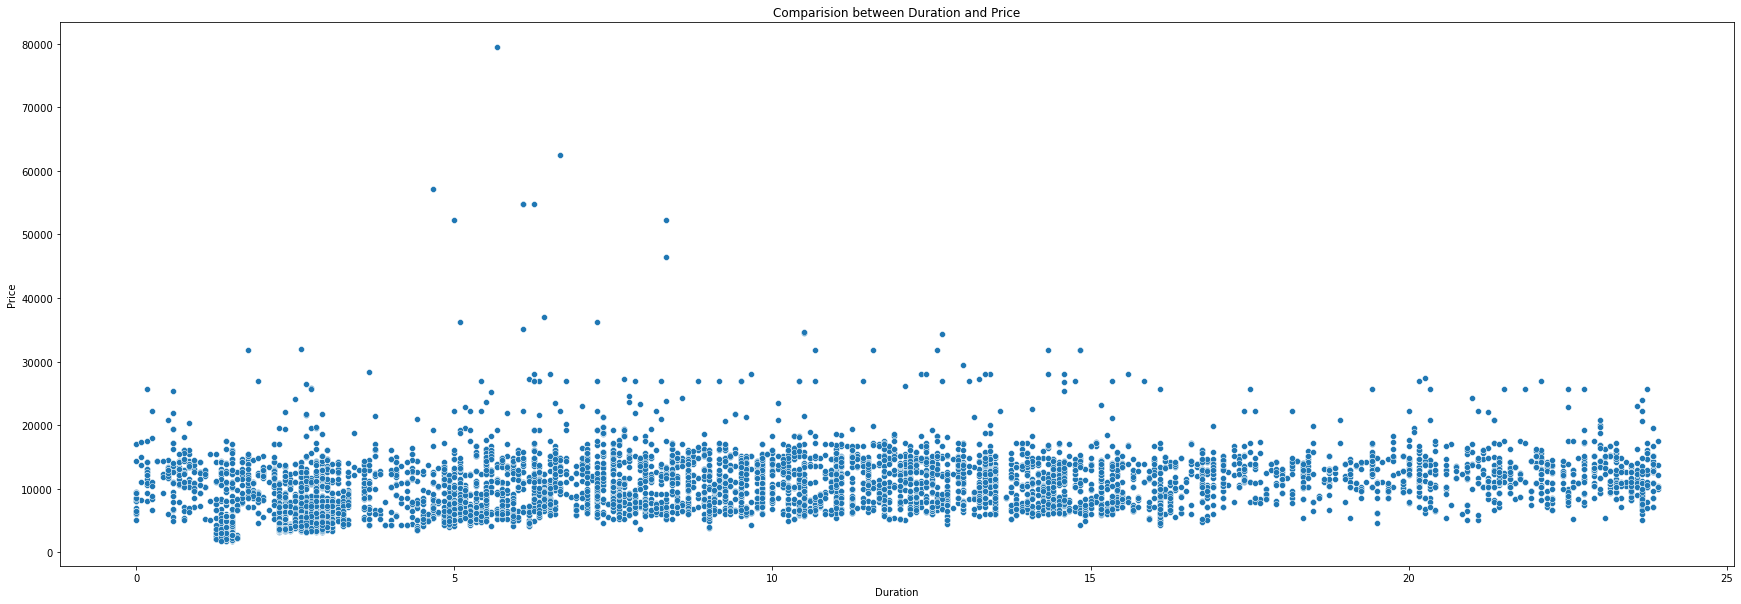

In [53]:
#Comparision between features using scatter plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Duration and Price')
sns.scatterplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.show()

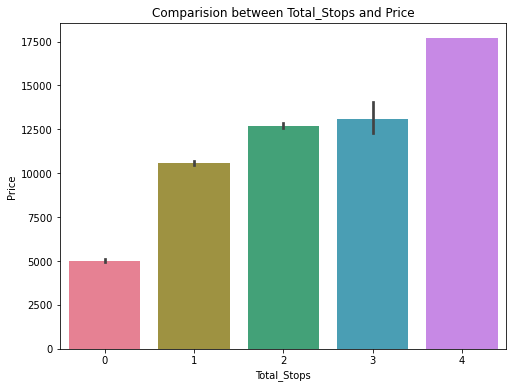

In [54]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.show()

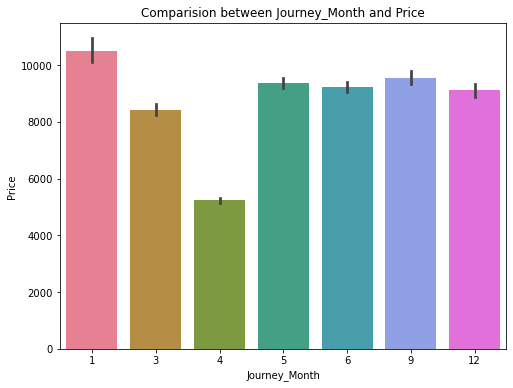

In [55]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.show()


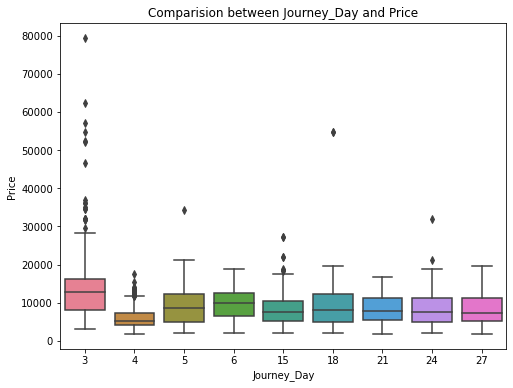

In [56]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Day and Price')
sns.boxplot(df['Journey_Day'],df['Price'],data=df,palette="husl")
plt.show()

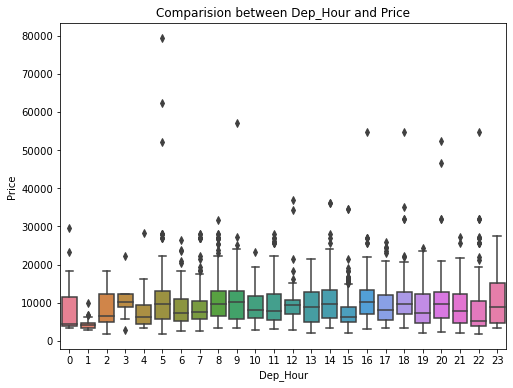

In [57]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Price')
sns.boxplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.show()

Departure Hour has no proper relation with price.

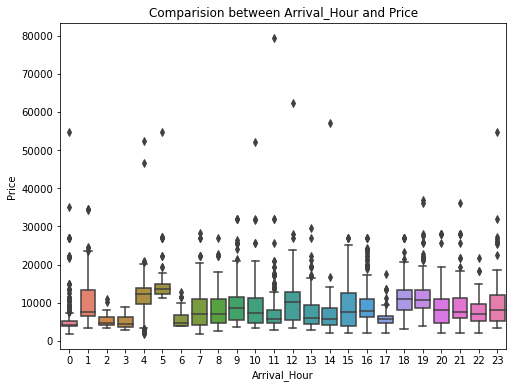

In [58]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.boxplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.show()

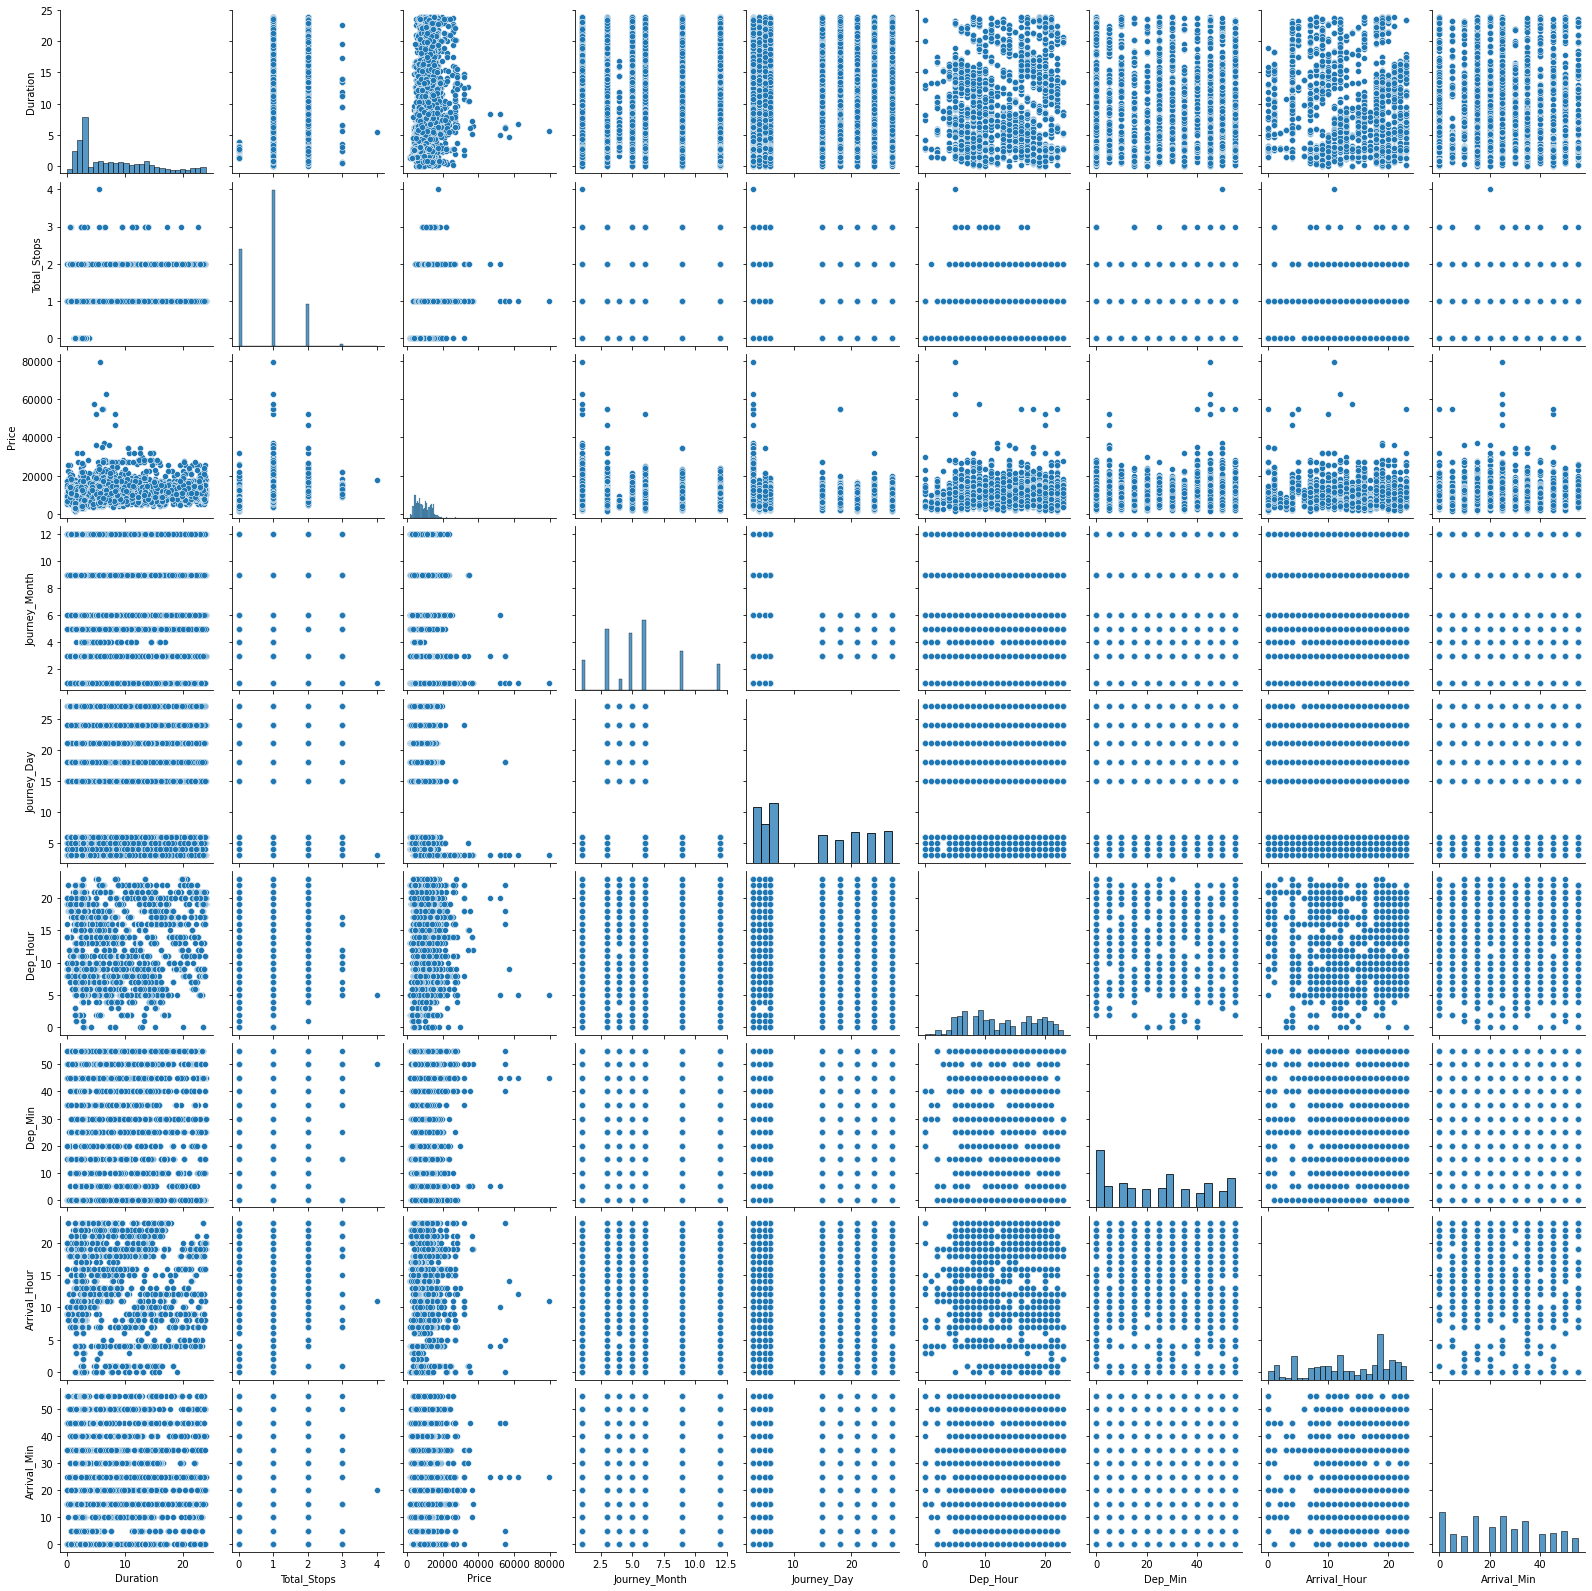

In [59]:
##Multivariate Analysis:
#pair ploting for df
sns.pairplot(df)

Above are the pair plots of each pair of features.we can notice some outliers in each plot.I have to take care of those outliers.

<AxesSubplot:>

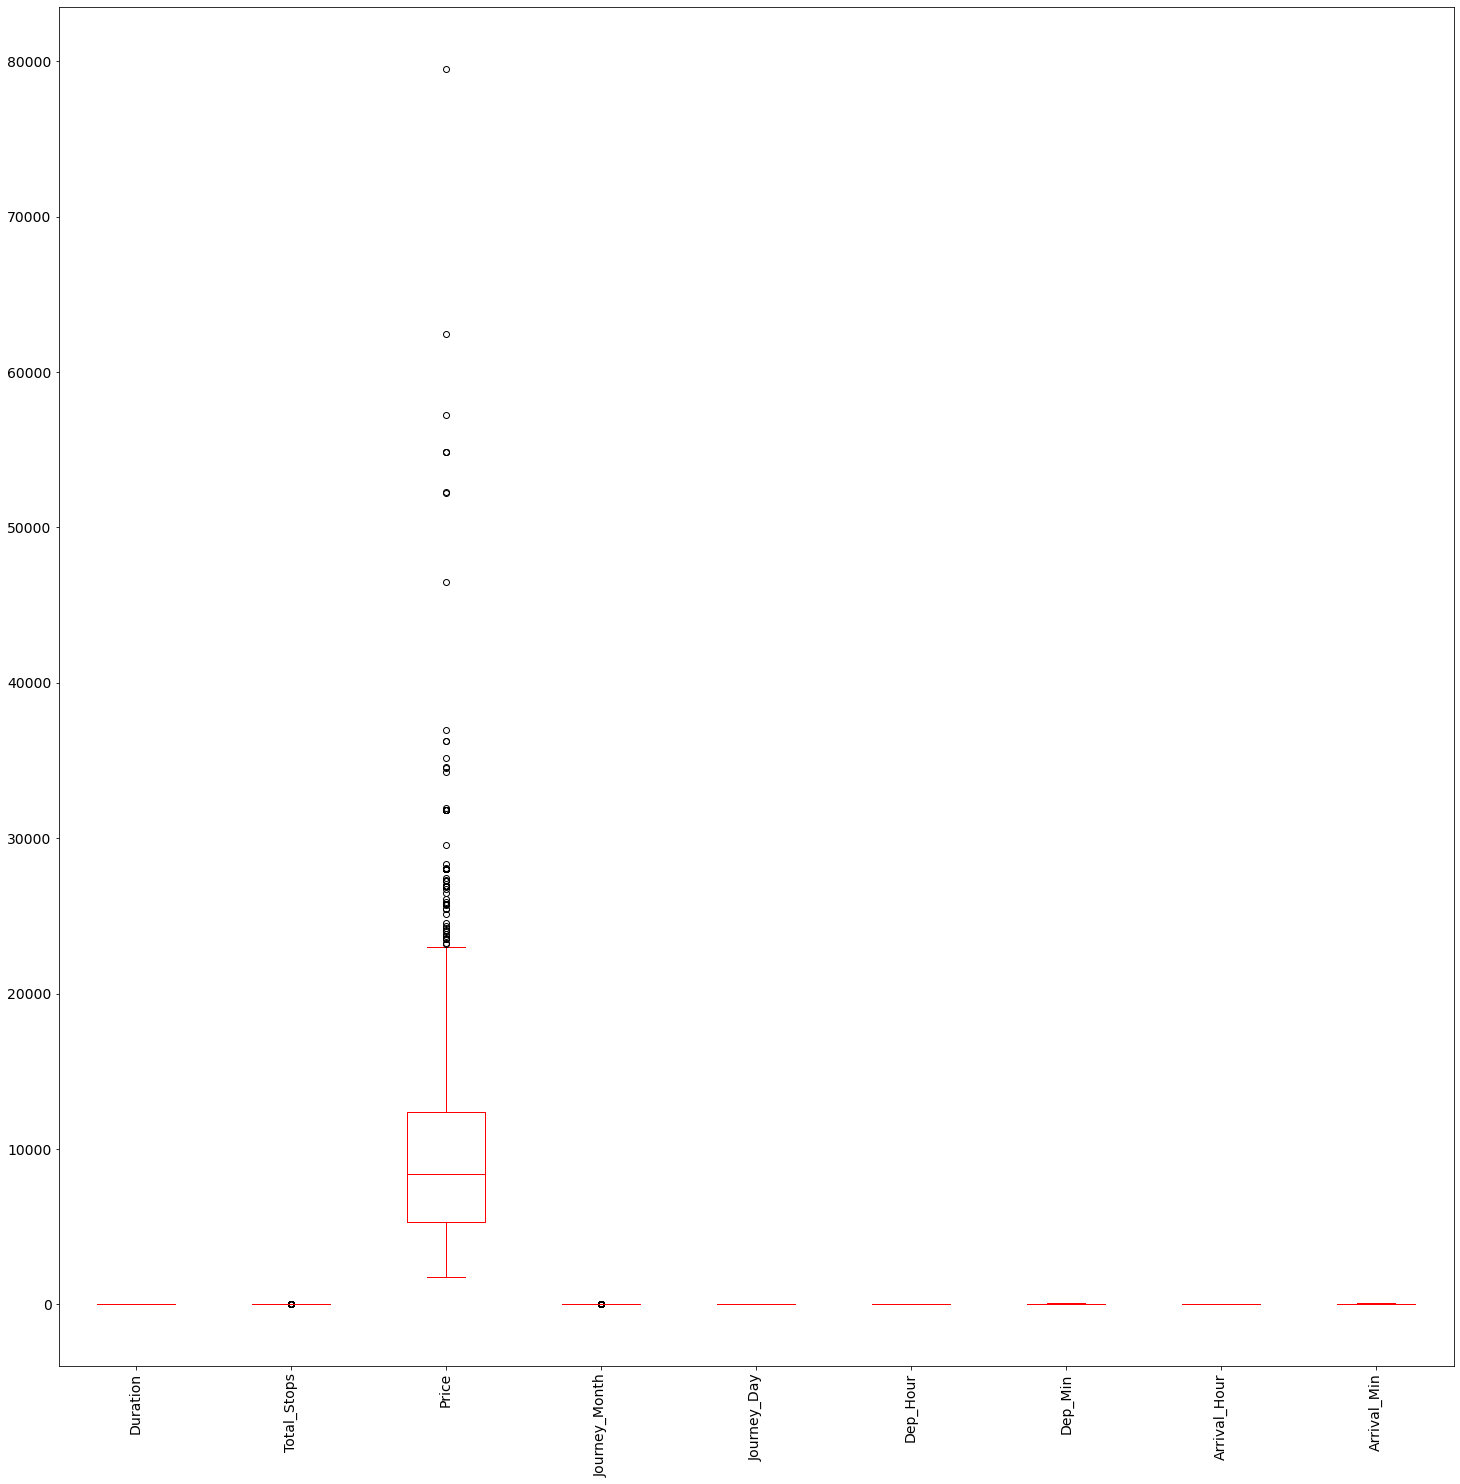

In [60]:
##Checking for outliers:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

In [61]:

##Removing Outliers:
#1.ZScore method:
#Features having outliers
features=df[['Journey_Month']]
from scipy.stats import zscore
z=np.abs(zscore(features))

df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2.500000,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3.000000,0,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,2.666667,0,No info,12648,1,3,11,30,14,10


In [62]:
df_new.shape

(10683, 14)

In [63]:
df.shape


(10683, 14)

In [64]:
##In my both datasets(new and old) have same rows and columns(10683,14).

#Checking dataloss in zscore method
Dataloss = (((10683-10683)/10683)*100)
Dataloss

0.0

There is no dataloss is present in the zscore method which means it had not removes any outliers present in the datasets.

In [65]:
#2.IQR Method:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removes the skewness using IQR Method.

In [66]:
#Checking shape of new dataset
df_1.shape

(9726, 14)

In [67]:
#Checking shape of old dataset
df.shape

(10683, 14)

In [68]:
#Checking dataloss in IQR method
Dataloss = (((10683-9726)/10683)*100)
Dataloss

8.958157820836844

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

In [69]:
#Checking for skewness:
#Checking for skewness
df_1.skew()

Duration         0.851356
Total_Stops      0.315096
Price            1.892394
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

In [70]:
##Removing skewness using yeo-johnson method:
#Creating a list of skewed features
fea=["Duration"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [71]:
#Using yeo_johnson method i have removing the skewness.

In [72]:
df_1[fea] = scaler.fit_transform(df_1[fea].values)
#Checking skewness again
df_1[fea].skew()

Duration    0.000721
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

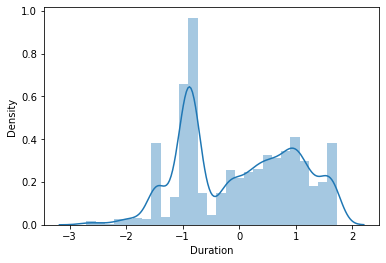

In [73]:
sns.distplot(df_1['Duration'])


In [74]:
#it looks like skewness is reduced.

In [75]:
#Label Encoding:
# Separating categorical columns in df_1
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [76]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)
df_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,2,16,6
1,1,3,0,78,6
2,4,2,1,112,6
4,3,0,2,27,6
5,6,3,0,58,6


In [77]:
#using label encoder i had encoded the categorical columns.

In [78]:
##Checking correlation using heat map:
cor=df_1.corr()
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.011183,0.060652,0.017397,-0.028970,-0.172712,-0.146616,0.020880,0.008746,0.025750,-0.024661,-0.067040,-0.014642,-0.083493
Source,-0.011183,1.000000,-0.428689,0.385694,0.067225,0.189680,-0.042452,0.010360,0.071145,0.009863,0.064645,-0.045119,0.023022,0.018436
Destination,0.060652,-0.428689,1.000000,-0.210140,-0.392358,-0.425690,0.076846,-0.263846,-0.072687,0.003989,-0.087151,0.091917,-0.059000,0.006345
Route,0.017397,0.385694,-0.210140,1.000000,0.338264,0.470162,0.017851,0.170346,0.131410,0.076424,-0.074617,-0.054603,0.016679,-0.177685
Duration,-0.028970,0.067225,-0.392358,0.338264,1.000000,0.621815,-0.129913,0.474787,0.064575,-0.022784,-0.031530,-0.041839,0.011640,-0.151809
Total_Stops,-0.172712,0.189680,-0.425690,0.470162,0.621815,1.000000,-0.083619,0.596254,0.076029,-0.022166,-0.060973,-0.007590,0.040415,-0.108505
Additional_Info,-0.146616,-0.042452,0.076846,0.017851,-0.129913,-0.083619,1.000000,-0.042563,-0.018736,-0.036811,-0.043188,-0.007537,0.030537,0.041405
Price,0.020880,0.010360,-0.263846,0.170346,0.474787,0.596254,-0.042563,1.000000,0.013499,-0.175841,0.007035,-0.030633,0.021683,-0.083728
Journey_Month,0.008746,0.071145,-0.072687,0.131410,0.064575,0.076029,-0.018736,0.013499,1.000000,-0.117084,0.015338,-0.027075,-0.012621,-0.046453
Journey_Day,0.025750,0.009863,0.003989,0.076424,-0.022784,-0.022166,-0.036811,-0.175841,-0.117084,1.000000,0.006146,-0.006040,-0.000101,-0.019700


In [79]:
#Above all are the correlations of the pair features. let me use the heatmap to know in better manner.

<AxesSubplot:>

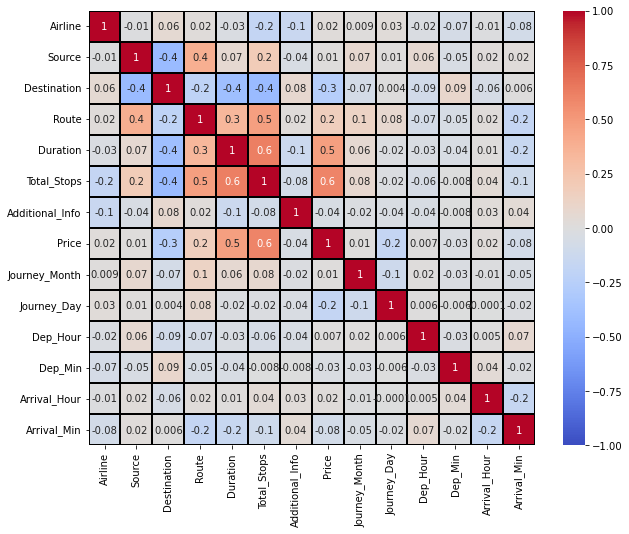

In [80]:
# Visualizing the correlation matri; by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")

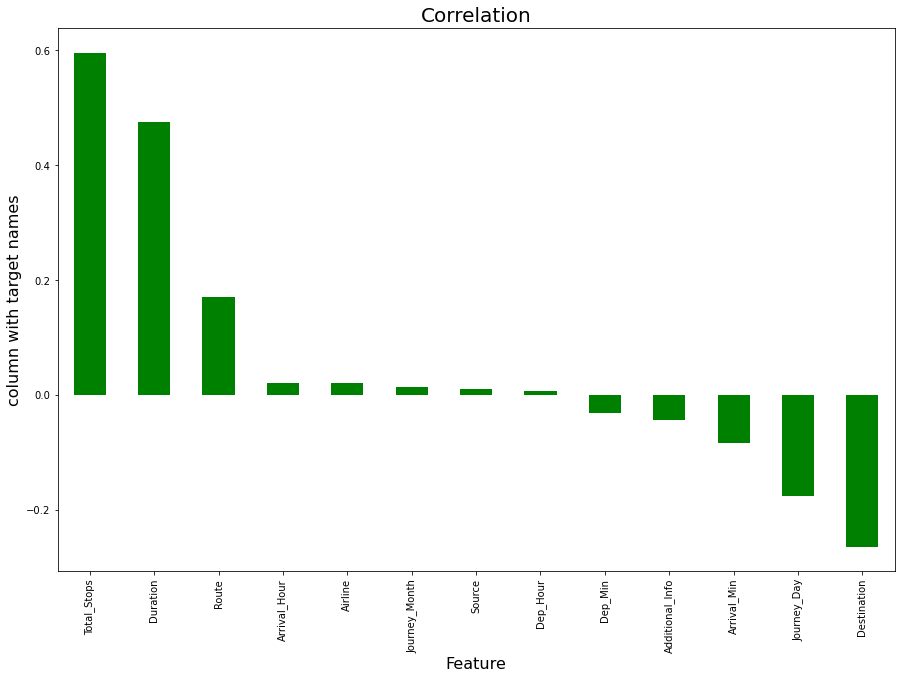

In [81]:

plt.figure(figsize=(15,10))
df_1.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=16)
plt.ylabel('column with target names',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

2.Test dataset:

In [82]:
#Printing test dataset
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [83]:
#Checking shape of test my dataset
dff.shape

(2671, 10)

In [84]:
#Checking all column names
dff.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [85]:
#Checking the data types of all columns
dff.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [86]:
#all the columns are object datatype only.

In [87]:
#Checking the info about the dataset(Test data)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


there is no null values present in the dataset.

In [88]:
#Checking unique values of each column
dff.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [89]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in dff.columns:
        print(dff[i].value_counts())
        print('*****************************************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*****************************************************************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03

In [90]:
dff.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [91]:
##Feature Extraction:
#Converting object data type to datetime 
dff['Date_of_Journey'] =  pd.to_datetime(dff['Date_of_Journey'])
dff['Dep_Time'] =  pd.to_datetime(dff['Dep_Time'])
dff['Arrival_Time'] =  pd.to_datetime(dff['Arrival_Time'])

In [92]:
# lets check again data types of all columns
dff.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [93]:
#now the data type has changed and have datetime and object data types.

In [94]:
#Extracting journey yea

#Extracting year
dff["Journey_Year"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
dff["Journey_Month"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
dff["Journey_Day"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.day

In [95]:
#Droping Date_of_journey column after extraction
dff = dff.drop(["Date_of_Journey"],axis=1)

In [96]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (dff["Arrival_Time"]-dff["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dff["Duration"] = Difference_list

In [97]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
dff["Dep_Hour"]=pd.to_datetime(dff["Dep_Time"]).dt.hour

#Extracting Hours
dff["Dep_Min"]=pd.to_datetime(dff["Dep_Time"]).dt.minute

In [98]:
dff = dff.drop(["Dep_Time"],axis=1)

In [99]:
#Extracting hours and minutes from Arrival_Time


#Extracting Hours
dff["Arrival_Hour"]=pd.to_datetime(dff["Arrival_Time"]).dt.hour

#Extracting Hours
dff["Arrival_Min"]=pd.to_datetime(dff["Arrival_Time"]).dt.minute

In [100]:

dff = dff.drop(["Arrival_Time"],axis=1)

In [101]:
#Dataset after extraction 
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [102]:
#Lets check the value counts now
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

In [103]:
#Droping unnecessary column
dff = dff.drop(["Journey_Year"],axis=1)

In [104]:
#Grouping Airlines column
dff["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

dff["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

dff["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [105]:
# Grouping Destination column
dff["Destination"].replace("New_Delhi","Delhi",inplace=True)

In [106]:
#Grouping Additional_Info column
dff["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

dff["Additional_Info"].replace("No Info","No info",inplace=True)

In [107]:



#Let me assign values for Total_Stops column
dff.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45


In [108]:
#describe the dataset
dff.describe()

,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

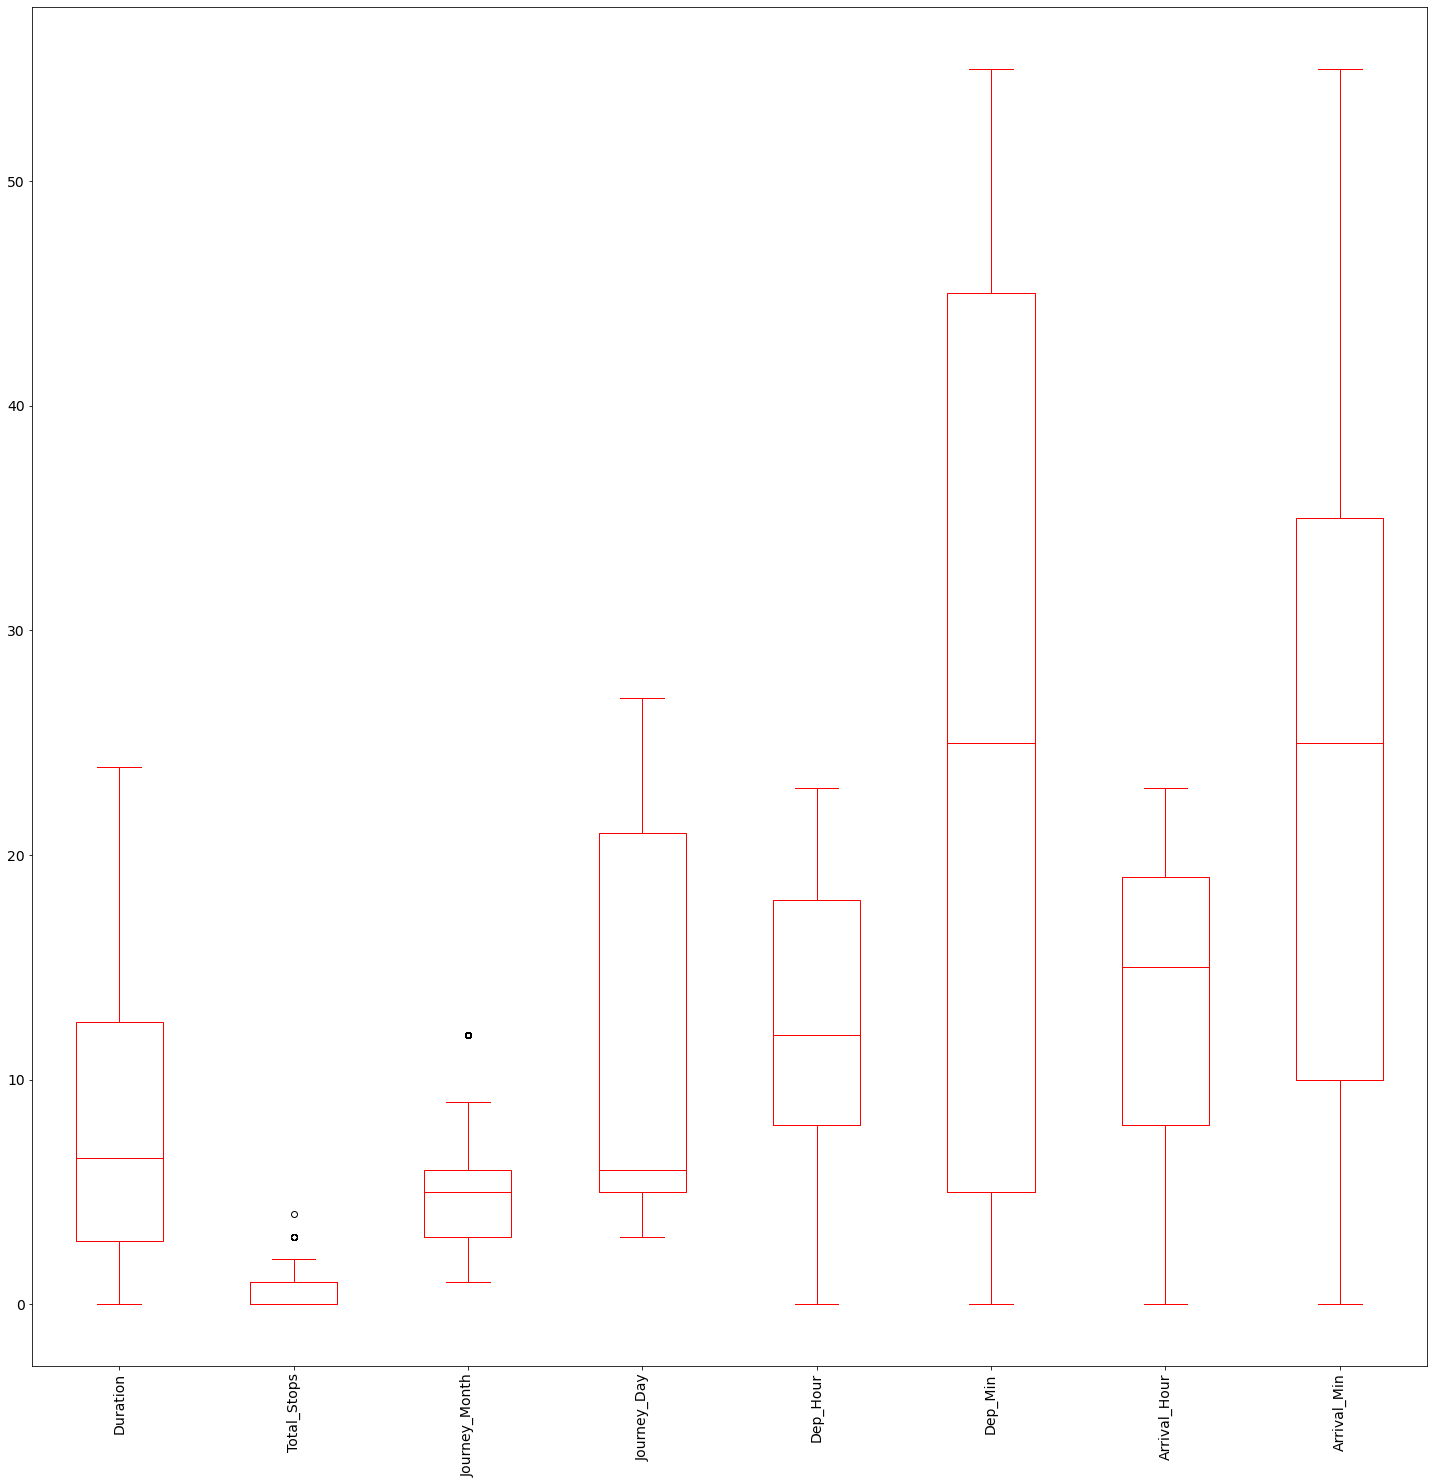

In [109]:
##Above is the statistics about the dataset.The mean and the 2nd quantile values are not same so there is extreme outliers in the dataset.

#Checking for outliers:
#checking for outliers using boxplot
dff.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

In [110]:
##The outliers are present in Total_stops,journey_month but we can't remove outliers of total_stops because it is categorical column .

#Removing Outliers:
#Zscore method:
#Features having outliers are
features=dff[['Journey_Month']]

In [111]:
from scipy.stats import zscore
z=np.abs(zscore(features))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,3,27,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1,No info,6,3,4,0,19,15


In [112]:
#Above skewness is removed by zscore method.

#checking the new dataset shape
dff_new.shape

(2671, 13)

In [113]:
#checking the old dataset shape
dff.shape

(2671, 13)

In [114]:
#In my old dataset also have the same rows and columns as new dataset.

#checking dataloss using the zscore method
Dataloss = (((2671-2671)/2671)*100)
Dataloss

0.0

In [115]:
#there is no dataloss in zscore method which means it has not removed any outliers .

In [116]:
##IQR Method:
# 1st quantile 

Q1=features.quantile(0.25)

# 3rd quantile

Q3=features.quantile(0.75)

# IQR

IQR=Q3 - Q1 


dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [117]:
# checking  the  new dataset shape
dff_1.shape

(2414, 13)

In [118]:
# checking the old dataset shape 

dff.shape

(2671, 13)

In [119]:
#checking dataloss in IQR method

Dataloss = (((2671-2414)/2671)*100)
Dataloss

9.621864470235867

By using the IQR method i have dataloss is less than 10% so i can use the IQR method to remove outliers.

In [120]:
#Checking for Skewness;
#checking for skewness

dff_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

In [121]:
#Removing skewness using yeo-johnson method:
#creating skewed features in a list

fea=["Duration"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [122]:
#dff_1[fea] = scaler.fit_transform(dff_1[fea].values)
#checking  the skewness again
dff_1[fea].skew()

Duration    0.812134
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

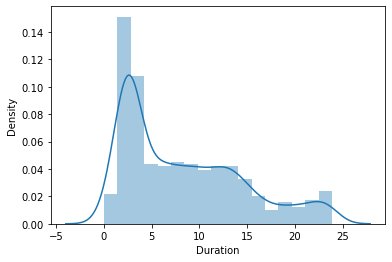

In [123]:
sns.distplot(dff_1['Duration'])

clearly it looks that the skewness is reduced.

In [124]:
#Label Encoding:
# Separating categorical columns in dff_1
cat_col=[]
for i in dff_1.dtypes.index:
    if dff_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [125]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dff_1[cat_col]= dff_1[cat_col].apply(LE.fit_transform)
dff_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


In [126]:
##I have encoded the categorical columns using the label encoder.

#Checking correlation using heat map:

In [127]:
cor=dff_1.corr()
# checking the correlation
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.025743,0.022849,0.006619,-0.091211,-0.192535,-0.149410,-0.002283,0.007439,0.009846,-0.059759,-0.015035,-0.108238
Source,-0.025743,1.000000,-0.560499,0.330589,0.099354,0.183536,-0.036250,0.044850,-0.025131,0.069805,-0.049378,0.003893,-0.022964
Destination,0.022849,-0.560499,1.000000,-0.441299,-0.234272,-0.308341,0.052189,-0.131436,-0.021423,-0.064536,0.134612,-0.010656,0.050694
Route,0.006619,0.330589,-0.441299,1.000000,0.316929,0.484534,0.040619,0.129223,0.040341,-0.123306,-0.036332,-0.000204,-0.225181
Duration,-0.091211,0.099354,-0.234272,0.316929,1.000000,0.604357,-0.133733,0.056489,-0.050996,-0.046273,-0.015875,-0.037216,-0.141333
Total_Stops,-0.192535,0.183536,-0.308341,0.484534,0.604357,1.000000,-0.069234,0.084167,-0.038463,-0.102686,-0.003003,0.034922,-0.118665
Additional_Info,-0.149410,-0.036250,0.052189,0.040619,-0.133733,-0.069234,1.000000,0.033281,-0.041788,-0.062081,0.019532,0.011078,0.022466
Journey_Month,-0.002283,0.044850,-0.131436,0.129223,0.056489,0.084167,0.033281,1.000000,-0.111535,-0.029400,-0.009782,0.010870,-0.026181
Journey_Day,0.007439,-0.025131,-0.021423,0.040341,-0.050996,-0.038463,-0.041788,-0.111535,1.000000,-0.011166,-0.021626,0.017975,-0.017399
Dep_Hour,0.009846,0.069805,-0.064536,-0.123306,-0.046273,-0.102686,-0.062081,-0.029400,-0.011166,1.000000,-0.041386,-0.000559,0.068546


Above are the correlations of all the pair of features.

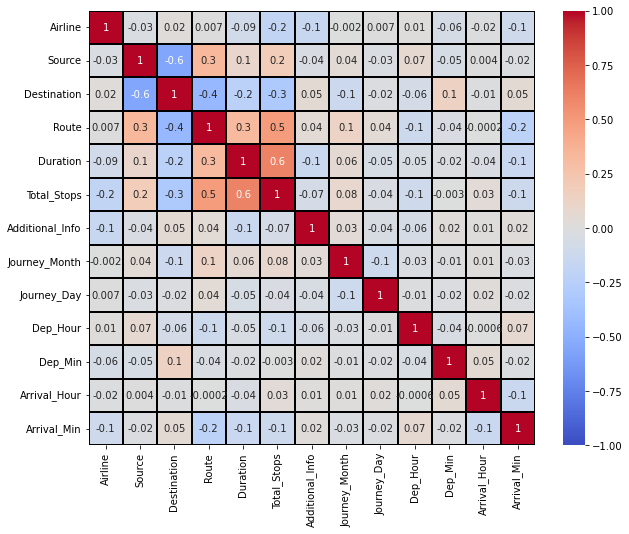

In [128]:
#visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [129]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_1= pd.DataFrame(scaler.fit_transform(dff_1),columns=dff_1.columns)

In [130]:
x_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.305394,0.784578,0.421292,0.258811,0.463204,0.460712,-0.778303,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.305394,0.784578,2.460377,0.258811,-2.246426,0.031473,0.948874,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.305394,0.784578,0.752313,0.258811,0.463204,0.031473,0.948874,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.386183,-1.413788,-0.863066,-1.228737,0.463204,0.460712,1.294310,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-0.996971,0.077960,-0.479083,0.258811,0.463204,-1.685484,-0.893448,0.435360,-0.512706,0.910089,0.313598


In [131]:
#Checking for multicolinearity issue using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
vif["Features"]=x_1.columns
vif

,vif_Features,Features
0,1.106271,Airline
1,1.501484,Source
2,1.735254,Destination
3,1.656557,Route
4,1.636232,Duration
5,1.972700,Total_Stops
6,1.072352,Additional_Info
7,1.043066,Journey_Month
8,1.029660,Journey_Day
9,1.048019,Dep_Hour


In [132]:
#there is no multicollinearity issue in this dataset.

#MODEL BUILDING FROM TRAIN DATASET:
#Separating features and label in train dataset:

In [133]:
x = df_1.drop("Price",axis=1)
y = df_1["Price"]

In [134]:
#i had separted the my target and independent columns.

In [135]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,16,-0.848535,0,6,3,24,22,20,1,10
1,1,3,0,78,0.232876,2,6,1,5,5,50,13,15
2,4,2,1,112,1.420381,2,6,9,6,9,25,4,25
4,3,0,2,27,-0.290740,1,6,1,3,16,50,21,35
5,6,3,0,58,-1.006944,0,6,6,24,9,0,11,25


In [136]:
#Checking for multicolinearity issue using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.095758,Airline
1,1.484266,Source
2,1.595172,Destination
3,1.621352,Route
4,1.802938,Duration
5,2.099914,Total_Stops
6,1.063287,Additional_Info
7,1.039366,Journey_Month
8,1.031428,Journey_Day
9,1.032383,Dep_Hour


In [137]:
##There is no multicollinearity issue in the dataset.

#Finding Best Random State and Accuracy:
#importing required libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9135770547418118  on Random_state  141


In [138]:
#Now i got the best accuracy and random state.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
#Created train test split.

In [139]:
#Regression Algorithms:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [140]:
#RandomForestRegressor:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9134738639276048
mean_squared_error: 1776338.412731576
mean_absolute_error: 657.6039082528259
root_mean_squared_error: 1332.7934621431693


In [141]:
#XGB Regressor:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8978698180732748
mean_squared_error: 2096681.6905347125
mean_absolute_error: 766.7195644993093
root_mean_squared_error: 1447.9922964348646


In [142]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8191560226984985
mean_squared_error: 3712636.6456839964
mean_absolute_error: 1279.3704284008052
root_mean_squared_error: 1926.8203459803917


In [143]:
#KNN:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7069298733170952
mean_squared_error: 6016583.512008226
mean_absolute_error: 1457.6729952021935
root_mean_squared_error: 2452.872502191711


In [144]:
#ExtraTreeRegressor:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9089566103361085
mean_squared_error: 1869075.3756754752
mean_absolute_error: 651.676602124743
root_mean_squared_error: 1367.1413151812344


In [145]:
#DecisionTreeRegressor:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.839901795131808
mean_squared_error: 3286736.2860025894
mean_absolute_error: 724.2333790267306
root_mean_squared_error: 1812.935819603824


In [146]:
#Cross Validation Score:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.886546892635199


In [147]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.8931060434463524


In [148]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.8918030807676371


In [149]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.8125225366789021


In [150]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7963049995892453


In [151]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7094836046020114


Above all are the cross validation scores of RFR,XGB,ETR,GBR,DTR and KNN.

By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model and i have to tune it to get better accuracy.

In [152]:
#Hyper Parameter Tuning:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [2,4,6,8,10],
              'n_jobs':[-2,-1,1,2]}
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

In [153]:
#Runs the grid search CV for XGB.

In [154]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...lta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

In [155]:
#Tunning the model using GCV.

GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -2}

In [156]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.78698180732748
mean_squared_error: 2096681.6905347125
mean_absolute_error: 766.7195644993093
RMSE value: 1447.9922964348646


In [157]:
##This is my model after tuning.I got 89.79% as r2_score which is best.But the accuracy has not increased it has remained same.

#Saving the model:
# Saving the model using .pkl

import joblib
joblib.dump(Best_mod,"FlightPrice.pkl")

['FlightPrice.pkl']

In [158]:
#Predicting Flight Price for test dataset using Saved model of trained dataset:
# Loading the saved model

model=joblib.load("FlightPrice.pkl")

#Prediction

prediction = model.predict(X_test)
prediction

array([14666.968 ,  9372.992 ,  4057.144 , ...,  6701.6646,  5325.328 ,
       10362.227 ], dtype=float32)

In [159]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
Predicted,14666.967773,9372.992188,4057.144043,6771.487305,6165.588379,10997.473633,11889.890625,6244.836914,10815.638672,7631.388672,...,13589.700195,14658.829102,2716.795166,13816.366211,17292.197266,5857.026855,4999.969238,6701.664551,5325.328125,10362.226562
Actual,14781.000000,8372.000000,3540.000000,5704.000000,5438.000000,11150.000000,12273.000000,5761.000000,10844.000000,7690.000000,...,14588.000000,14714.000000,2754.000000,13885.000000,17471.000000,6347.000000,4995.000000,4959.000000,6015.000000,9103.000000


In [160]:
##Above are the predicted values and the actual values but they are alomost similar.

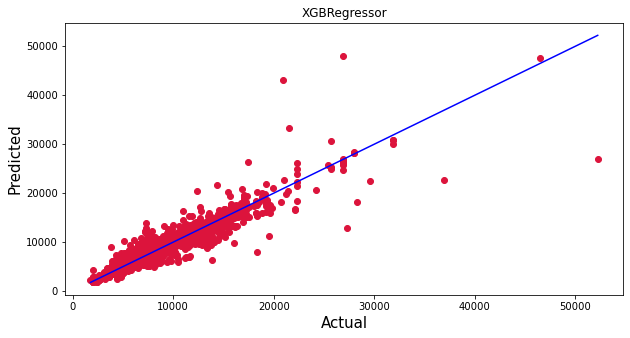

In [161]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

In [162]:
#Predicting flight price using cleaned test dataset dff_1
Predicted_FlightPrice=model.predict(dff_1)
Predicted_FlightPrice

array([7662.7134, 8214.709 , 7570.76  , ..., 7662.7134, 8376.374 ,
       7662.7134], dtype=float32)

In [163]:
#Making dataframe for predicted Price
FlightPricePredictions=pd.DataFrame()
FlightPricePredictions["Price"]=Predicted_FlightPrice
FlightPricePredictions

,Price
0,7662.713379
1,8214.708984
2,7570.759766
3,12535.888672
4,8884.283203
...,...
2409,8561.624023
2410,7653.851562
2411,7662.713379
2412,8376.374023


In [164]:
#Lets save the predictions to csv
FlightPricePredictions.to_csv("FlightPricePredictions.csv",index=False)